# Modelos Predictivos  Parte II

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.metrics import f1_score,classification_report,confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
df_agro_Nuevo = pd.read_csv(r'..\\Bases de datos\\EvaluacionAgro03.csv',sep=';')
df_agro_Nuevo.head()

,Cultivo,grupoCultivo,areaSembradaHa,produccionTon,rendimientoTonHa,grupoCultivoOrd,EstadoFinalOrd,PeriodoOrd,CicloOrd,CultivoFre
0,Fresa,Frutales,3.0,30.0,10.0,1,0,2,1,223
1,Avena,Cereales,160.0,480.0,3.0,5,0,0,0,88
2,Cebada,Cereales,20.0,60.0,3.0,5,0,0,0,186
3,Maíz,Cereales,180.0,360.0,2.0,5,0,0,0,1624
4,Cebolla De Bulbo,Hortalizas,120.0,2400.0,20.0,2,0,0,0,541


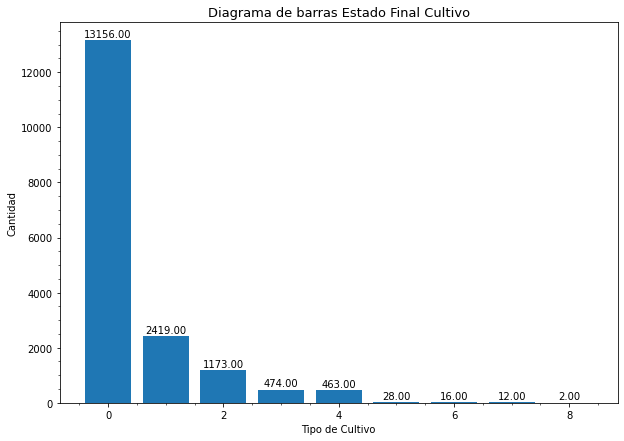

In [3]:
a = df_agro_Nuevo.EstadoFinalOrd.value_counts()
plt.figure(figsize=(10,7))
plt.title('Diagrama de barras Estado Final Cultivo',fontsize = 13)
plt.bar(a.index, height=a)
plt.minorticks_on()
plt.xlabel('Tipo de Cultivo')
plt.ylabel('Cantidad')
for i in range(len(a)):
    plt.text(i,a[i]+120,f'{a[i]:.2f}',ha='center')
plt.show()
plt.show()

Funciones Utiles

In [4]:
def evalucion(y_test,y_predict):
    print('Evalución del Modelo'.center(75,'='),'\n')
    print(f'\tF1_Score Macro: {f1_score(y_test,y_predict,average= "macro"):.3f}')
    print(f'\tF1_Score Weighted: {f1_score(y_test,y_predict,average= "weighted"):.3f}')
    print(classification_report(y_test,y_predict))

def Matrix(y_test,y_predict):
    print(''.center(75,'='))
    cm = confusion_matrix(y_test,y_predict)
    plt.figure(figsize=(9,6))
    plt.title('Matriz de confusión multiclase',fontsize=17)
    sns.heatmap(cm,annot=True,cmap='Greens',fmt='d')
    plt.ylabel('Predicciones',fontsize = 14)
    plt.xlabel('Reales',fontsize = 14)
    plt.show()

# *Modelo de clasificación para la predicción del estado final de los cultivos.*

## 1. Arboles de clasificación

In [5]:
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

#Estandarización de los datos
scaler = StandardScaler()

X_clas = df_agro_Nuevo.drop(columns=['EstadoFinalOrd']).iloc[:,2:]
y_clas = df_agro_Nuevo['EstadoFinalOrd']
X_scaler_clas = scaler.fit_transform(X_clas)

#Reducción de la dimensionalidad
pca= PCA(n_components=6)
X_Pca_clas=pca.fit_transform(X_scaler_clas)
varianza=pca.explained_variance_ratio_

#validación del numéro minimo de componentes principales
print(f'Varianza explicada = {varianza.sum():.2f}')

#División del conjunto de datos de entrenamiento y prueba para el 20%
X_train,X_test,y_train,y_test = train_test_split(X_Pca_clas,y_clas,test_size=0.2,random_state=42)

modelo_tree_clas = DecisionTreeClassifier()
modelo_tree_clas.fit(X_train,y_train)
y_predict_clas = modelo_tree_clas.predict(X_test)

print(y_predict_clas[0:10])
print(y_test[0:10].values)

Varianza explicada = 0.98
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


### Evaluación del modelo

============================Evalución del Modelo=========================== 

	F1_Score Macro: 0.963
	F1_Score Weighted: 0.959
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2639
           1       0.87      0.84      0.85       488
           2       1.00      1.00      1.00       225
           3       1.00      1.00      1.00        82
           4       0.98      1.00      0.99       108
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.96      3549
   macro avg       0.95      0.98      0.96      3549
weighted avg       0.96      0.96      0.96      3549



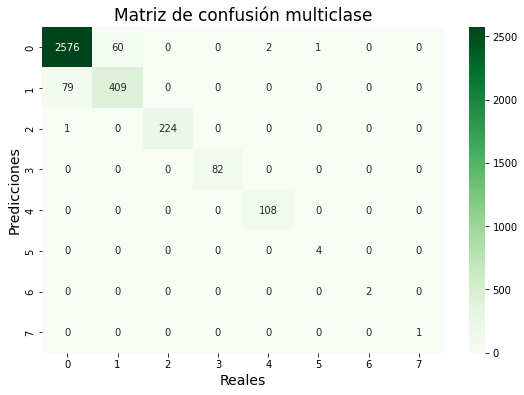

In [6]:
evalucion(y_test,y_predict_clas)
Matrix(y_test,y_predict_clas)

In [7]:
modelo_tree_clas.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

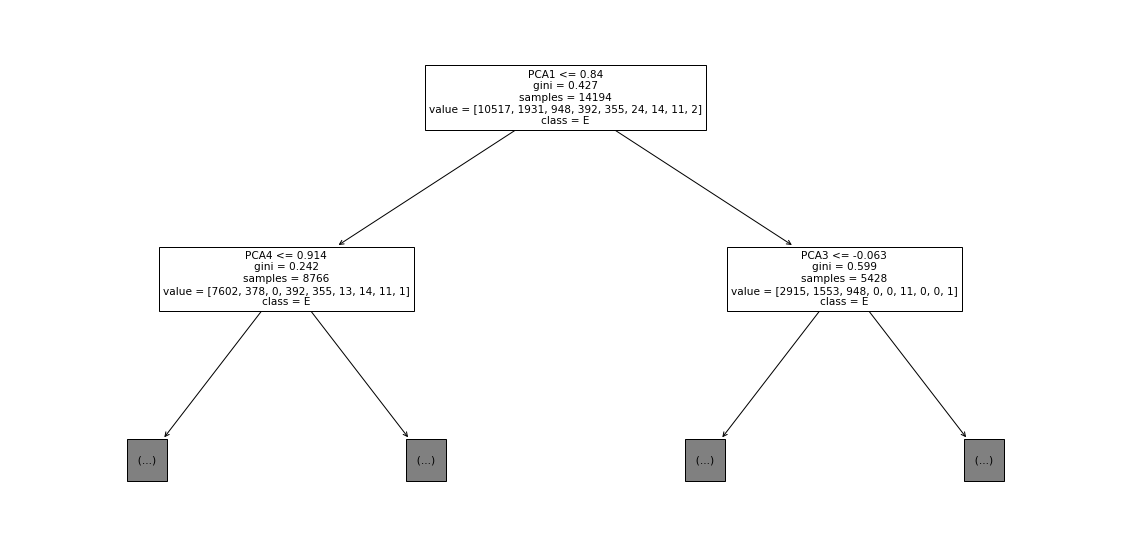

In [8]:
from sklearn import tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(modelo_tree_clas,feature_names=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'],class_names='EstadoFinal',max_depth=1)
plt.show()

## 2. Bosques aleratorios de Clasificación

In [9]:
#se establece como variable a predecir la variable EsadoFinalOrd
df_agro_Nuevo.head()

,Cultivo,grupoCultivo,areaSembradaHa,produccionTon,rendimientoTonHa,grupoCultivoOrd,EstadoFinalOrd,PeriodoOrd,CicloOrd,CultivoFre
0,Fresa,Frutales,3.0,30.0,10.0,1,0,2,1,223
1,Avena,Cereales,160.0,480.0,3.0,5,0,0,0,88
2,Cebada,Cereales,20.0,60.0,3.0,5,0,0,0,186
3,Maíz,Cereales,180.0,360.0,2.0,5,0,0,0,1624
4,Cebolla De Bulbo,Hortalizas,120.0,2400.0,20.0,2,0,0,0,541


In [10]:
# Selección del conjunto de datos a trabajar
X_clas_FC = df_agro_Nuevo.iloc[:,2:].drop(columns='EstadoFinalOrd').values
y_clas_FC  = df_agro_Nuevo['EstadoFinalOrd'].values

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#creación del modelo de bosques aleatorios
model_Forest_classifier = RandomForestClassifier(n_estimators=100
                                               ,criterion='gini'
                                               ,max_depth=16,
                                               random_state=42)
#División del conjunto de datos en train y test del 20%
X_train_FC,X_test_FC,y_train_FC,y_test_FC = train_test_split(X_clas_FC,y_clas_FC,test_size=0.2,random_state=42)

model_Forest_classifier.fit(X_train_FC,y_train_FC)
y_predict_clas_FC = model_Forest_classifier.predict(X_test_FC)

============================Evalución del Modelo=========================== 

	F1_Score Macro: 0.949
	F1_Score Weighted: 0.962
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2639
           1       0.87      0.86      0.86       488
           2       1.00      1.00      1.00       225
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00       108
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.96      3549
   macro avg       0.95      0.95      0.95      3549
weighted avg       0.96      0.96      0.96      3549



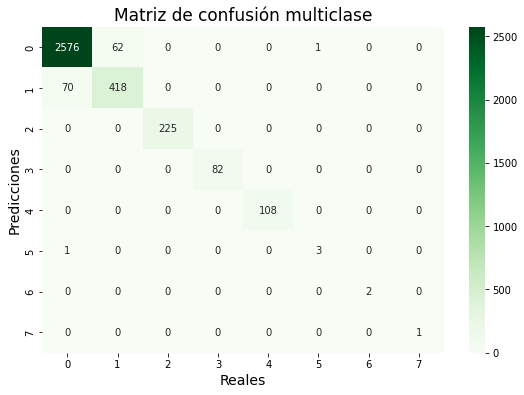

In [12]:
evalucion(y_test_FC,y_predict_clas_FC)
Matrix(y_test_FC,y_predict_clas_FC)

In [13]:
model_Forest_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### 2.1.  Ajuste de los hiperparametros

In [14]:
from sklearn.model_selection import GridSearchCV

paraemtros_FC = {'criterion':('gini','entropy'),
                 'max_depth':(8,16),
                 'n_estimators':(100,150)}
hiperParametros_Model_FC = GridSearchCV(model_Forest_classifier,paraemtros_FC,scoring=['f1_macro','f1_weighted'],refit='f1_macro')

In [15]:
#entrenamiento
hiperParametros_Model_FC.fit(X_train_FC,y_train_FC)

GridSearchCV(estimator=RandomForestClassifier(max_depth=16, random_state=42),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (8, 16),
                         'n_estimators': (100, 150)},
             refit='f1_macro', scoring=['f1_macro', 'f1_weighted'])

In [16]:
hiperParametros_Model_FC.best_estimator_

RandomForestClassifier(max_depth=16, random_state=42)

In [17]:
hiperParametros_Model_FC.best_score_

0.9656636555438587

============================Evalución del Modelo=========================== 

	F1_Score Macro: 0.949
	F1_Score Weighted: 0.962
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2639
           1       0.87      0.86      0.86       488
           2       1.00      1.00      1.00       225
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00       108
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.96      3549
   macro avg       0.95      0.95      0.95      3549
weighted avg       0.96      0.96      0.96      3549



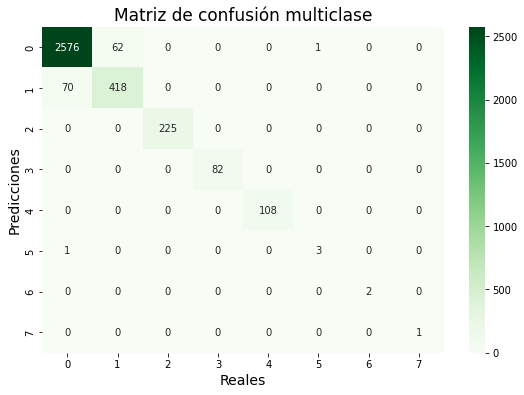

In [18]:
y_predict_clas_FCH = hiperParametros_Model_FC.predict(X_test_FC)
evalucion(y_test_FC,y_predict_clas_FCH)
Matrix(y_test_FC,y_predict_clas_FCH)

## 3. SMV de clasificación 

============================Evalución del Modelo=========================== 

	F1_Score Macro: 0.584
	F1_Score Weighted: 0.925
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2639
           1       0.71      0.82      0.76       488
           2       0.96      0.99      0.97       225
           3       0.99      1.00      0.99        82
           4       1.00      0.99      1.00       108
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.92      3549
   macro avg       0.58      0.59      0.58      3549
weighted avg       0.93      0.92      0.93      3549



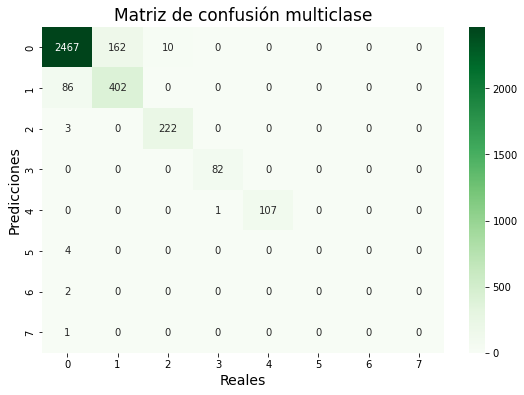

In [19]:
from sklearn.svm import SVC

Model_SVC = SVC(kernel='linear')
# se usan los datos ya tratado durante el prepocesamiento, la estandarización y el PCA
# Entrenamiento del modelo
Model_SVC.fit(X_train,y_train)

y_predict_clas_SVC = Model_SVC.predict(X_test)
#Evaluación
evalucion(y_test,y_predict_clas_SVC)
Matrix(y_test,y_predict_clas_SVC)

In [20]:
parametros_SVC = {'kernel':('linear','poly','rbf')}
hiperparametros_model_SVC = GridSearchCV(Model_SVC,
                                         parametros_SVC,
                                         scoring=['f1_macro','f1_weighted'],refit='f1_macro')
hiperparametros_model_SVC.fit(X_train,y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'kernel': ('linear', 'poly', 'rbf')}, refit='f1_macro',
             scoring=['f1_macro', 'f1_weighted'])

In [21]:
hiperparametros_model_SVC.best_estimator_

SVC()

In [22]:
hiperparametros_model_SVC.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(kernel='linear'),
 'n_jobs': None,
 'param_grid': {'kernel': ('linear', 'poly', 'rbf')},
 'pre_dispatch': '2*n_jobs',
 'refit': 'f1_macro',
 'return_train_score': False,
 'scoring': ['f1_macro', 'f1_weighted'],
 'verbose': 0}

============================Evalución del Modelo=========================== 

	F1_Score Macro: 0.591
	F1_Score Weighted: 0.942
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2639
           1       0.74      0.89      0.81       488
           2       1.00      1.00      1.00       225
           3       0.95      0.99      0.97        82
           4       1.00      0.97      0.99       108
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.94      3549
   macro avg       0.58      0.60      0.59      3549
weighted avg       0.94      0.94      0.94      3549



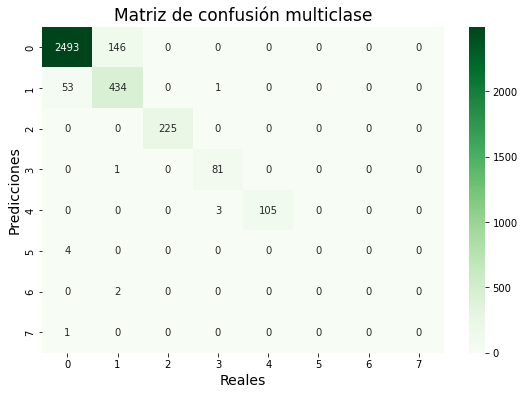

In [23]:
evalucion(y_test,hiperparametros_model_SVC.predict(X_test))
Matrix(y_test,hiperparametros_model_SVC.predict(X_test))

## 4. Validación cruzada

Dado que los datos presentan un desbalanceo se opta por trabajar con una validación cruzada estratificada y tomando como metrica principal de la evaluación f1_macro

### 4.1. Arboles de clasificación

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
metrics_tree_clas = cross_validate(modelo_tree_clas,
                           X_Pca_clas,y_clas,
                           cv=skf,
                           scoring=['f1_macro','f1_weighted'])
metrics_tree_clas

{'fit_time': array([0.0766983 , 0.06589222, 0.06766391, 0.06827211, 0.07305527]),
 'score_time': array([0.0026226 , 0.00306249, 0.00399113, 0.00300145, 0.00492859]),
 'test_f1_macro': array([0.84704085, 0.97566292, 0.95883183, 0.83958475, 0.83781963]),
 'test_f1_weighted': array([0.96145423, 0.9557069 , 0.96251233, 0.96163975, 0.96177133])}

In [25]:
metrics_tree_clas['test_f1_macro'].mean()

0.891787994342739

In [26]:
def validacion_cruzada(metricas):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize = (15,5))
    fig.suptitle('Metricas',fontsize=14)
    ax[0].set_title('F1 Macro')
    ax[0].bar(range(0,5),height=metricas['test_f1_macro'],color = 'green')
    ax[0].axhline(metricas['test_f1_macro'].mean(),
                color='red', linestyle='--',
                linewidth=2,
                label=f'Promedio: {metricas["test_f1_macro"].mean():.3f}')
    ax[0].set_xlabel('Validación')
    ax[0].legend()

    ax[1].set_title('F1 Weighted')
    ax[1].bar(range(0,5),height=metricas['test_f1_weighted'],color = 'limegreen')
    ax[1].set_xlabel('Validación')
    ax[1].axhline(metricas['test_f1_weighted'].mean(),
                color='red', linestyle='--',
                linewidth=2,
                label=f'Promedio: {metricas["test_f1_weighted"].mean():.3f}')
    ax[1].legend()
    fig.show()

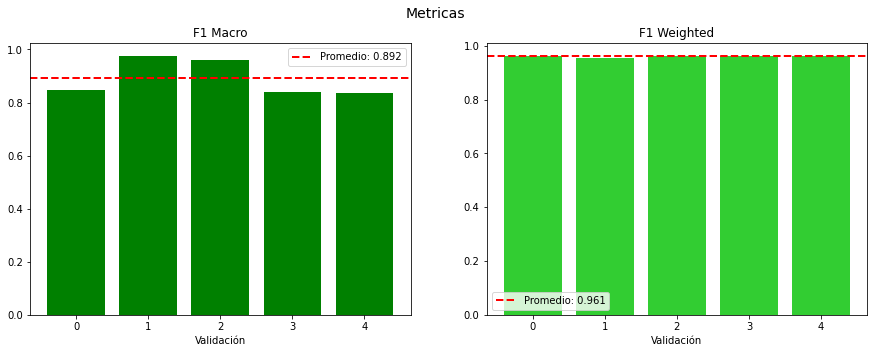

In [27]:
validacion_cruzada(metricas=metrics_tree_clas)

### 4.2. Bosque Aletorios de Clasificación

In [28]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
metrics_ramd_forest = cross_validate(model_Forest_classifier,
                           X_clas_FC,y_clas_FC,
                           cv=skf,
                           scoring=['f1_macro','f1_weighted'])
metrics_ramd_forest

{'fit_time': array([0.67537951, 0.6823318 , 0.6733346 , 0.66258311, 0.67425323]),
 'score_time': array([0.04333329, 0.0444293 , 0.04473853, 0.0429008 , 0.04692531]),
 'test_f1_macro': array([0.94812312, 0.97921181, 0.9829341 , 0.93955892, 0.9478701 ]),
 'test_f1_weighted': array([0.96860229, 0.96154231, 0.96849475, 0.96473066, 0.96840209])}

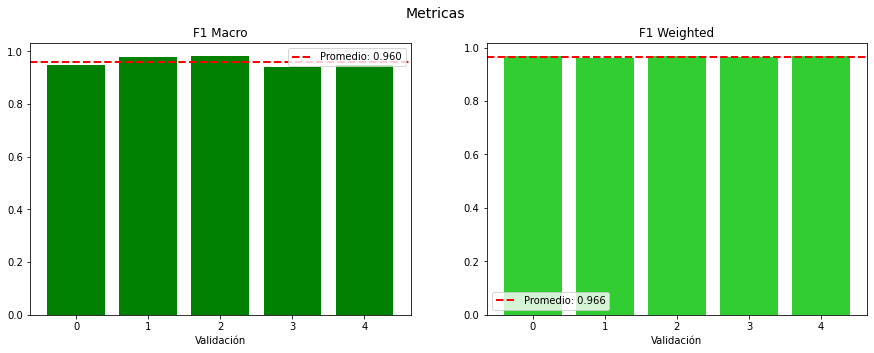

In [29]:
validacion_cruzada(metricas=metrics_ramd_forest)

### 4.3. SMV de clasificación

In [30]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
metrics_SMV = cross_validate(Model_SVC,
                           X_Pca_clas,y_clas,
                           cv=skf,
                           scoring=['f1_macro','f1_weighted'])
metrics_SMV

{'fit_time': array([1.70516896, 1.56081438, 1.74596047, 1.68667626, 1.75597358]),
 'score_time': array([0.26248598, 0.26224518, 0.26804876, 0.2761004 , 0.26880765]),
 'test_f1_macro': array([0.5103668 , 0.63924822, 0.63930408, 0.70718542, 0.51610133]),
 'test_f1_weighted': array([0.9199732 , 0.91426807, 0.91551701, 0.92175881, 0.91884303])}

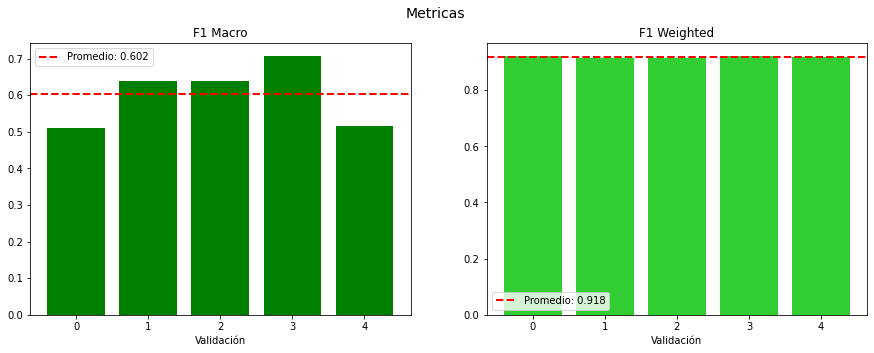

In [31]:
validacion_cruzada(metricas=metrics_SMV)

## 5. Resultados

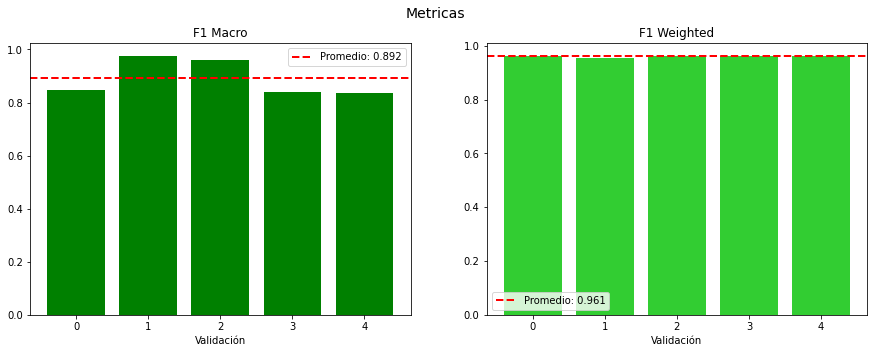

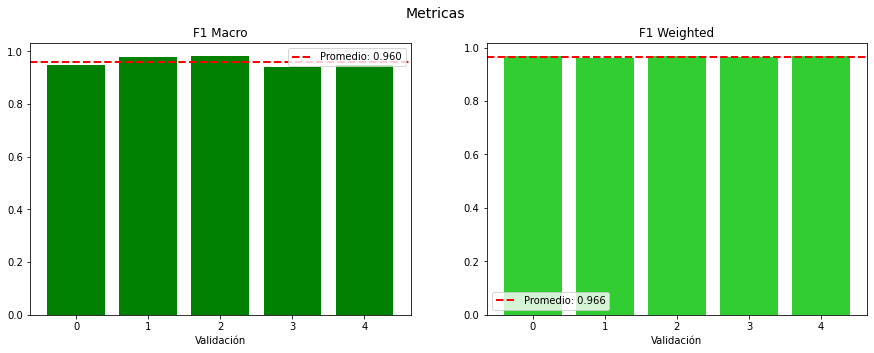

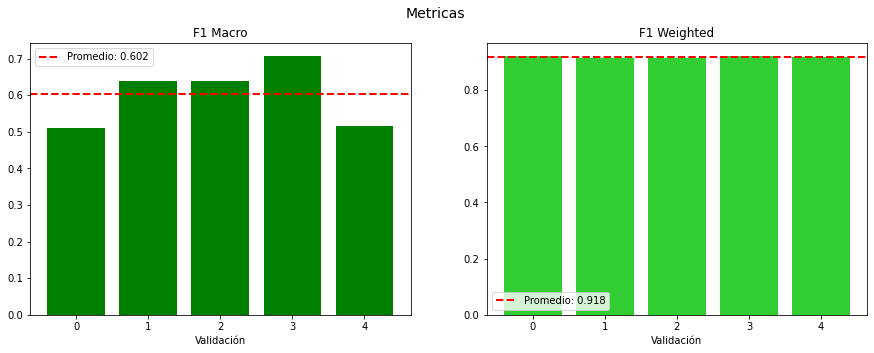

In [32]:
validacion_cruzada(metricas=metrics_tree_clas)
validacion_cruzada(metricas=metrics_ramd_forest)
validacion_cruzada(metricas=metrics_SMV)

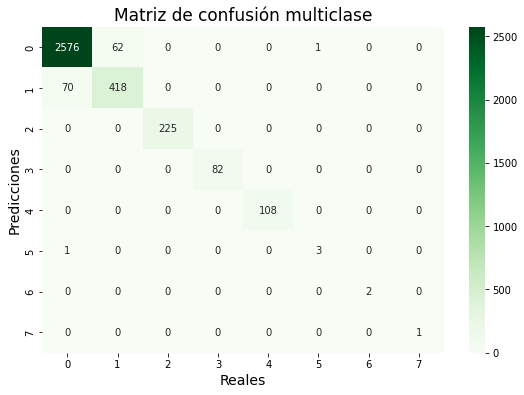

In [33]:
Matrix(y_test=y_test_FC,y_predict=y_predict_clas_FC)